In [32]:
#Importing dependencies

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import pickle
import joblib

In [33]:
#Read in the CSV
df = pd.read_csv('../Resources/Beach_Lab_Data.csv')

In [34]:
#Sorting values

df.sort_values('DNA Sample Timestamp',ascending=False)

,DNA Test ID,DNA Sample Timestamp,Beach,DNA Sample 1 Reading,DNA Sample 2 Reading,DNA Reading Mean,Culture Test ID,Culture Sample 1 Timestamp,Culture Sample 1 Reading,Culture Sample 2 Reading,Culture Reading Mean,Culture Note,Culture Sample Interval,Culture Sample 2 Timestamp,Latitude,Longitude,Location
7772,5898.0,09/04/2017 12:00:00 AM,57th Street,234.0,389.0,301.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.7911,-87.5797,"(41.7911, -87.5797)"
18404,5903.0,09/04/2017 12:00:00 AM,Foster,6.0,105.0,25.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.9785,-87.6515,"(41.9785, -87.6515)"
9829,5896.0,09/04/2017 12:00:00 AM,Calumet,129.0,143.0,135.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.7142,-87.5299,"(41.7142, -87.5299)"
7506,5911.0,09/04/2017 12:00:00 AM,Osterman,36.0,193.0,83.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.9877,-87.6545,"(41.9877, -87.6545)"
9234,5912.0,09/04/2017 12:00:00 AM,Leone,111.0,118.0,114.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0131,-87.6635,"(42.0131, -87.6635)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24278,NaN,NaN,Juneway,NaN,NaN,NaN,108062.0,08/19/2013 12:00:00 AM,2.0,1.0,1.4,NaN,NaN,NaN,42.0224,-87.6674,"(42.0224, -87.6674)"
24280,NaN,NaN,Leone,NaN,NaN,NaN,109868.0,07/31/2014 12:00:00 AM,25.0,18.0,21.2,NaN,NaN,NaN,42.0131,-87.6635,"(42.0131, -87.6635)"
24281,NaN,NaN,Howard,NaN,NaN,NaN,113525.0,07/26/2016 09:00:00 AM,30.0,36.0,32.9,NaN,1.0,07/26/2016 09:01:00 AM,42.0188,-87.6663,"(42.0188, -87.6663)"
24283,NaN,NaN,Howard,NaN,NaN,NaN,112193.0,05/24/2012 12:00:00 AM,10.8,8.6,9.6,NaN,NaN,NaN,42.0188,-87.6663,"(42.0188, -87.6663)"


In [35]:
# Deleting NaN values
df = df[df['DNA Reading Mean'].notna()]

In [36]:
df = df.drop(columns=['Culture Test ID','Culture Sample 1 Timestamp','Culture Sample 1 Reading','Culture Sample 2 Reading','Culture Reading Mean','Culture Note','Culture Sample Interval','Culture Sample 2 Timestamp'])

In [37]:
#Using pd.datetime pandas function
df['Date'] = pd.to_datetime(df['DNA Sample Timestamp'], errors = 'coerce')

In [38]:
#Cleaning the time stap data in the df
df['Sample_Date'] = pd.to_datetime(df['Date']).dt.to_period('D')

In [39]:
#Dropping NaN values for the sample date
df = df[df['Sample_Date'].notna()]

In [40]:
#Sorting the df by sample data
df.sort_values('Sample_Date',ascending=False)

,DNA Test ID,DNA Sample Timestamp,Beach,DNA Sample 1 Reading,DNA Sample 2 Reading,DNA Reading Mean,Latitude,Longitude,Location,Date,Sample_Date
25279,15413.0,07/24/2021 11:15:00 AM,Humboldt,2.0,NaN,2.0,41.90643,-87.703717,"(41.90643, -87.703717)",2021-07-24 11:15:00,2021-07-24
25270,15388.0,07/24/2021 11:14:00 AM,Oakwood,14.0,NaN,14.0,41.82110,-87.597600,"(41.8211, -87.5976)",2021-07-24 11:14:00,2021-07-24
25262,15389.0,07/24/2021 11:14:00 AM,Margaret T Burroughs (31st),3345.0,NaN,3345.0,41.83930,-87.607200,"(41.8393, -87.6072)",2021-07-24 11:14:00,2021-07-24
25264,15384.0,07/24/2021 11:14:00 AM,Rainbow,18.0,NaN,18.0,41.75800,-87.551000,"(41.758, -87.551)",2021-07-24 11:14:00,2021-07-24
25265,15385.0,07/24/2021 11:14:00 AM,South Shore,11.0,NaN,11.0,41.76890,-87.563600,"(41.7689, -87.5636)",2021-07-24 11:14:00,2021-07-24
...,...,...,...,...,...,...,...,...,...,...,...
11247,184.0,05/26/2015 12:00:00 AM,South Shore,77.5,280.6,147.0,41.76890,-87.563600,"(41.7689, -87.5636)",2015-05-26 00:00:00,2015-05-26
17249,202.0,05/26/2015 12:00:00 AM,Montrose,60.3,149.6,95.0,41.96550,-87.638500,"(41.9655, -87.6385)",2015-05-26 00:00:00,2015-05-26
9725,75.0,05/26/2015 12:00:00 AM,Calumet,392.8,111.1,209.0,41.71420,-87.529900,"(41.7142, -87.5299)",2015-05-26 00:00:00,2015-05-26
7245,116.0,05/26/2015 12:00:00 AM,Rainbow,212.8,117.1,158.0,41.75800,-87.551000,"(41.758, -87.551)",2015-05-26 00:00:00,2015-05-26


In [41]:
#Grouping by sample date and getting the mean for each day 
df_grouped = df.groupby('Sample_Date').mean()
#reseting index
df_grouped = df_grouped.reset_index()
df_grouped.head()

,Sample_Date,DNA Test ID,DNA Sample 1 Reading,DNA Sample 2 Reading,DNA Reading Mean,Latitude,Longitude
0,2015-05-26,136.4,196.96,145.68,147.8,41.79786,-87.57156
1,2015-05-27,112.0,375.10,662.82,438.0,41.79786,-87.57156
2,2015-05-28,116.4,239.42,253.38,223.4,41.79786,-87.57156
3,2015-06-01,130.8,303.64,374.88,331.0,41.79786,-87.57156
4,2015-06-02,132.2,217.02,137.32,157.8,41.79786,-87.57156


In [42]:
#Reading in the data set
water_quality = pd.read_csv('../Resources/Beach_Water_Quality.csv')
water_quality.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Calumet Beach,04/07/2018 12:30:00 AM,21.7,3.15,NaN,0.389,3.0,0.0,04/07/2018 12:30 AM,CalumetBeach201804072430
1,Ohio Street Beach,06/14/2019 07:00:00 PM,16.0,2.18,NaN,0.137,3.0,11.8,06/14/2019 7:00 PM,OhioStreetBeach201906141900
2,Ohio Street Beach,05/16/2018 01:00:00 PM,21.7,1.92,NaN,0.023,1.0,10.3,05/16/2018 1:00 PM,OhioStreetBeach201805161300
3,Ohio Street Beach,05/16/2018 02:00:00 PM,21.9,1.81,NaN,0.026,6.0,10.3,05/16/2018 2:00 PM,OhioStreetBeach201805161400
4,Ohio Street Beach,06/04/2018 09:00:00 AM,23.0,0.03,NaN,0.021,8.0,12.4,06/04/2018 9:00 AM,OhioStreetBeach201806040900


In [43]:
#Dropping cloumns
cleaned_quality = water_quality.drop(columns=["Turbidity","Transducer Depth", "Wave Height","Wave Period","Battery Life", "Measurement Timestamp Label"])

In [44]:
#Dropping NAN values
cleaned_quality = cleaned_quality[cleaned_quality['Water Temperature'].notna()]

In [45]:
#Using pd.datetime pandas function
cleaned_quality['Sample_Date'] = pd.to_datetime(cleaned_quality['Measurement Timestamp']).dt.to_period('D')
cleaned_quality

,Beach Name,Measurement Timestamp,Water Temperature,Measurement ID,Sample_Date
0,Calumet Beach,04/07/2018 12:30:00 AM,21.7,CalumetBeach201804072430,2018-04-07
1,Ohio Street Beach,06/14/2019 07:00:00 PM,16.0,OhioStreetBeach201906141900,2019-06-14
2,Ohio Street Beach,05/16/2018 01:00:00 PM,21.7,OhioStreetBeach201805161300,2018-05-16
3,Ohio Street Beach,05/16/2018 02:00:00 PM,21.9,OhioStreetBeach201805161400,2018-05-16
4,Ohio Street Beach,06/04/2018 09:00:00 AM,23.0,OhioStreetBeach201806040900,2018-06-04
...,...,...,...,...,...
40307,Ohio Street Beach,07/16/2021 03:00:00 AM,21.9,OhioStreetBeach202107160300,2021-07-16
40308,Ohio Street Beach,07/16/2021 05:00:00 AM,21.8,OhioStreetBeach202107160500,2021-07-16
40309,Ohio Street Beach,07/16/2021 07:00:00 AM,21.8,OhioStreetBeach202107160700,2021-07-16
40310,Ohio Street Beach,07/16/2021 09:00:00 AM,21.7,OhioStreetBeach202107160900,2021-07-16


In [46]:
#Group by sample date and getting the mean
cleaned_quality = cleaned_quality.groupby('Sample_Date').mean()
cleaned_quality = cleaned_quality.reset_index()
cleaned_quality.head()

,Sample_Date,Water Temperature
0,2013-08-30,20.30
1,2013-08-31,21.50
2,2013-09-03,22.55
3,2013-09-18,18.90
4,2014-05-21,27.10


In [47]:
# Reading in the CSV

path = ("../Resources/weather_lake_7_27.csv")
df1 = pd.read_csv(path, low_memory=False)
df1

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,DAPR,DAPR_ATTRIBUTES,...,WT05,WT05_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT08,WT08_ATTRIBUTES,WT09,WT09_ATTRIBUTES,WT11,WT11_ATTRIBUTES
0,US1ILDP0098,"DOWNERS GROVE 0.9 S, IL US",41.784019,-88.016753,229.5,2019-06-03,NaN,NaN,11.0,",,N",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1ILDP0098,"DOWNERS GROVE 0.9 S, IL US",41.784019,-88.016753,229.5,2019-06-04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1ILDP0098,"DOWNERS GROVE 0.9 S, IL US",41.784019,-88.016753,229.5,2019-06-05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1ILDP0098,"DOWNERS GROVE 0.9 S, IL US",41.784019,-88.016753,229.5,2019-06-06,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1ILDP0098,"DOWNERS GROVE 0.9 S, IL US",41.784019,-88.016753,229.5,2019-06-07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93100,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.960190,-87.931620,201.8,2021-07-20,9.40,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,",,W",NaN,NaN,NaN,NaN
93101,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.960190,-87.931620,201.8,2021-07-21,8.95,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93102,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.960190,-87.931620,201.8,2021-07-22,4.47,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,",,W",NaN,NaN,NaN,NaN
93103,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.960190,-87.931620,201.8,2021-07-23,7.61,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,",,W",NaN,NaN,NaN,NaN


In [48]:
# create df with only needed columns:
# air temp, rainfall

starter_df = df1[['NAME', 'LATITUDE', 'LONGITUDE', 'DATE', 'PRCP','TMAX']]
#rename columns
starter_df = starter_df.rename(columns={'NAME': 'Station Name', 'LATITUDE': 'Latitude',
                                       'LONGITUDE': 'Longitude', 'DATE': 'Date', 'PRCP': 'Precipitation',
                                       'TMAX': 'Temperature_Max'})

starter_df

,Station Name,Latitude,Longitude,Date,Precipitation,Temperature_Max
0,"DOWNERS GROVE 0.9 S, IL US",41.784019,-88.016753,2019-06-03,NaN,NaN
1,"DOWNERS GROVE 0.9 S, IL US",41.784019,-88.016753,2019-06-04,0.00,NaN
2,"DOWNERS GROVE 0.9 S, IL US",41.784019,-88.016753,2019-06-05,0.64,NaN
3,"DOWNERS GROVE 0.9 S, IL US",41.784019,-88.016753,2019-06-06,0.00,NaN
4,"DOWNERS GROVE 0.9 S, IL US",41.784019,-88.016753,2019-06-07,0.00,NaN
...,...,...,...,...,...,...
93100,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.960190,-87.931620,2021-07-20,0.00,88.0
93101,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.960190,-87.931620,2021-07-21,0.00,75.0
93102,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.960190,-87.931620,2021-07-22,0.00,86.0
93103,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.960190,-87.931620,2021-07-23,0.00,89.0


In [49]:
df12 = starter_df[(starter_df["Station Name"] == 'CHICAGO OHARE INTERNATIONAL AIRPORT, IL US')]
df12

,Station Name,Latitude,Longitude,Date,Precipitation,Temperature_Max
92320,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-01,0.00,80.0
92321,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-02,0.00,70.0
92322,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-03,0.00,67.0
92323,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-04,0.29,82.0
92324,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-05,0.29,83.0
...,...,...,...,...,...,...
93100,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2021-07-20,0.00,88.0
93101,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2021-07-21,0.00,75.0
93102,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2021-07-22,0.00,86.0
93103,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2021-07-23,0.00,89.0


In [50]:
df12 = df12[df12['Temperature_Max'].notna()]
df12

,Station Name,Latitude,Longitude,Date,Precipitation,Temperature_Max
92320,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-01,0.00,80.0
92321,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-02,0.00,70.0
92322,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-03,0.00,67.0
92323,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-04,0.29,82.0
92324,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-05,0.29,83.0
...,...,...,...,...,...,...
93099,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2021-07-19,0.00,85.0
93100,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2021-07-20,0.00,88.0
93101,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2021-07-21,0.00,75.0
93102,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2021-07-22,0.00,86.0


In [51]:
df12['Sample_Date'] = pd.to_datetime(df12['Date']).dt.to_period('D')

<ipython-input-51-bf585c0a26d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df12['Sample_Date'] = pd.to_datetime(df12['Date']).dt.to_period('D')


In [52]:
joined1 = pd.merge(df12, df_grouped, how='inner', on='Sample_Date')

In [53]:
joined2 = pd.merge(joined1, cleaned_quality, how = 'inner', on='Sample_Date')

In [54]:
#dropped outliers
joined2["Date"] = pd.to_datetime(joined2["Date"])
joined2

,Station Name,Latitude_x,Longitude_x,Date,Precipitation,Temperature_Max,Sample_Date,DNA Test ID,DNA Sample 1 Reading,DNA Sample 2 Reading,DNA Reading Mean,Latitude_y,Longitude_y,Water Temperature
0,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-01,0.00,80.0,2019-06-01,10564.263158,81.210526,453.210526,141.952632,41.897595,-87.617900,16.176190
1,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-02,0.00,70.0,2019-06-02,10583.210526,122.578947,158.473684,120.031579,41.897595,-87.617900,14.840909
2,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-03,0.00,67.0,2019-06-03,10605.263158,107.263158,57.578947,55.673684,41.897595,-87.617900,15.009091
3,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-04,0.29,82.0,2019-06-04,10654.210526,155.842105,80.944444,97.547368,41.897595,-87.617900,15.056522
4,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-05,0.29,83.0,2019-06-05,10702.210526,189.315789,273.315789,166.763158,41.897595,-87.617900,16.243478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2021-07-12,0.04,74.0,2021-07-12,15079.500000,195.777778,NaN,195.777778,41.884479,-87.617273,21.087500
114,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2021-07-13,0.00,80.0,2021-07-13,15025.944444,165.055556,NaN,165.055556,41.884479,-87.617273,21.486957
115,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2021-07-14,0.00,84.0,2021-07-14,15132.611111,204.277778,NaN,204.277778,41.884479,-87.617273,21.775000
116,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2021-07-15,1.12,79.0,2021-07-15,15156.888889,274.166667,NaN,274.166667,41.884479,-87.617273,21.979167


In [55]:
joined2.to_csv('../Resources/full_master_data.csv',index=False)

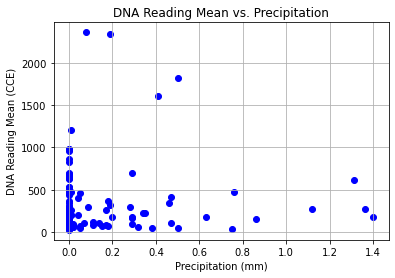

In [56]:
plt.scatter(joined2['Precipitation'],joined2['DNA Reading Mean'],c="blue", label="DNA Reading Mean vs. Precipitation")
plt.xlabel('Precipitation (mm)')
plt.ylabel('DNA Reading Mean (CCE)')
plt.title("DNA Reading Mean vs. Precipitation")
plt.grid()
plt.savefig('../Resources/DNA_Precip.png',bbox_inches='tight',facecolor='w')
plt.show()

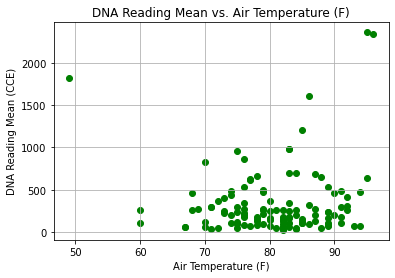

In [57]:
plt.scatter(joined2['Temperature_Max'],joined2['DNA Reading Mean'],c="green", label="DNA Reading Mean vs. Air Temperature")
plt.xlabel('Air Temperature (F)')
plt.ylabel('DNA Reading Mean (CCE)')
plt.title("DNA Reading Mean vs. Air Temperature (F)")
plt.grid()
plt.savefig('../Resources/DNA_AirTemp.png',bbox_inches='tight',facecolor='w')
plt.show()

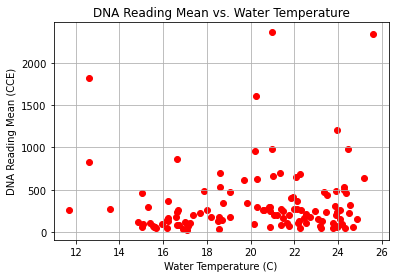

In [58]:
plt.scatter(joined2['Water Temperature'],joined2['DNA Reading Mean'],c="red", label="DNA Reading Mean vs. Water Temperature (C)")
plt.xlabel('Water Temperature (C)')
plt.ylabel('DNA Reading Mean (CCE)')
plt.title("DNA Reading Mean vs. Water Temperature")
plt.grid()
plt.savefig('../Resources/DNA_WaterTemp.png',bbox_inches='tight',facecolor='w')
plt.show()

In [59]:
# Assign X (data) and y (target)

X = joined2[['Precipitation', 'Temperature_Max', 'Water Temperature']]
y = joined2["DNA Reading Mean"].values.reshape(-1, 1)
print(X.shape, y.shape)

(118, 3) (118, 1)


In [60]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [61]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [63]:
pickle.dump(X_scaler, open('scaler.pkl', 'wb'))

In [64]:
pickle.dump(y_scaler, open('yscaler.pkl', 'wb'))

In [67]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [68]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

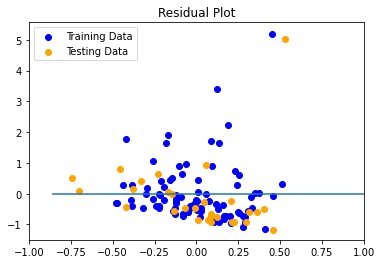

In [69]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.xlim(-1,1)
plt.title("Residual Plot")
plt.savefig('../Resources/Model.png',bbox_inches='tight',facecolor='w')
plt.show()

In [70]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, predictions)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 2.169893761240812, R2: 1.0


In [71]:
model.coef_

array([[-0.03299825,  0.20855746,  0.04102468]])

In [72]:
model.intercept_

array([1.27160234e-16])

In [73]:
test_df = pd.DataFrame([[1.23,65,65]])
testdf_scaled = X_scaler.transform(test_df)
result = model.predict(testdf_scaled)
print(y_scaler.inverse_transform(result))

[[323.71475632]]


In [83]:
import pickle

In [84]:
pickle.dump(model, open('model.p','wb'))